THIS IS A NOTEBOOK TO DEMONSTRATE HOW TO EXTRACT BASIC INFORMATION FROM GOOGLE SEARCHES 

In [ ]:
# !pip3 install pytrends
# !pip install --upgrade --user git+https://github.com/GeneralMills/pytrends
import pytrends
from pytrends.request import TrendReq as UTrendReq
import pandas as pd   
from datetime import date
import os.path as op
import requests
# from google.colab import drive

In [2]:
GET_METHOD='get'


headers = {
    'authority': 'trends.google.com',
    'accept': 'application/json, text/plain, */*',
    'accept-language': 'el-GR,el;q=0.9,en;q=0.8,es;q=0.7',
    'content-type': 'application/json;charset=UTF-8',
    'cookie': '__utma=10102256.1937595387.1677588086.1677588086.1678441622.2; __utmc=10102256; __utmz=10102256.1678441622.2.2.utmcsr=trends.google.com|utmccn=(referral)|utmcmd=referral|utmcct=/; __utmt=1; __utmb=10102256.13.9.1678442016068; CONSENT=YES+GB.en-GB+; HSID=AwrWd8APwv-yBWgzh; SSID=AeXCoum7ArBP5_-aa; APISID=CH4IjtEJhVzXdXGB/AFPE6uuFtOUDiSjnb; SAPISID=FcPgZF83fs0zxFml/Ad59_bwdrgg_kZ4q4; __Secure-1PAPISID=FcPgZF83fs0zxFml/Ad59_bwdrgg_kZ4q4; __Secure-3PAPISID=FcPgZF83fs0zxFml/Ad59_bwdrgg_kZ4q4; SID=TwhPHvTugfJu62Xh-HCJkOIPdoEDrL6q-6Eu9itbEI8mmKw9wzJdgT6c48lYdsNyN4E5xA.; __Secure-1PSID=TwhPHvTugfJu62Xh-HCJkOIPdoEDrL6q-6Eu9itbEI8mmKw9mFTrJ0j2r8zMRcq3v-A7Dg.; __Secure-3PSID=TwhPHvTugfJu62Xh-HCJkOIPdoEDrL6q-6Eu9itbEI8mmKw9xQIlYIR6TyZD2qXkeuopSA.; OGPC=19031986-1:; AEC=ARSKqsLpZW_sbZN2NdijlA8HPzuRHa1TPtYLHLGgaOIZpt8oJZL9PYZZYQ; SEARCH_SAMESITE=CgQI4ZcB; 1P_JAR=2023-03-10-09; NID=511=bYRTpZST7bJyL0z371h4Y79EMA1j9QqQFUpi8vJsSmiWdINx5gKruSDljEBAFfs9FYsxRrmP7vulT_MdtU2xEXQSW837vsgNY9s0i2WZAeFETmMEDrju3d_HgA2Wxy5DrFrIOaOiFu6LkpD7pY4wF4qrMZ38BzvW4NkYX_fUI7bFzHXsg24iHara1hPmPIXOSl6wQgsssfGHUntOI9PgY_eXaAEJbY7VgTr1hjNvEDlFSYOuzLvHSzo9kX9ALXA5-WOICbuLdAucZc3hJKo1dUKM51JCkzLsUHm99MWA86Icz-dmMW8ybQZhEUd2YgsBHHn5MV8uSVpcZ53n4_KL7r6sOpfWZ0ZXairmL3NH-hHz4Vyq; _gid=GA1.3.1682047475.1678441583; OTZ=6935626_48_48_123900_44_436380; _gat_gtag_UA_4401283=1; _ga=GA1.3.1937595387.1677588086; SIDCC=AFvIBn_I_znBUYDEoxfE1jUbrp_F8T607DZhlzI9o_gQoZmA4OxNjglOrH8Q8er3Cv4uzoWYkX9Z; __Secure-1PSIDCC=AFvIBn_Nhc9nywxJ_UrRYogvErcX48ygHEiBzjRRZtPe-mIwBTe_M7UbvKR4d-rAuhYyGJi-Dm0; __Secure-3PSIDCC=AFvIBn8vpeAOp5e0oAWBAETEzSClsyQlm3vQJhAQP7T7Z51q1K7zHDm_-CSGFEPasFw0sRHoJDU; _ga_VWZPXDNJJB=GS1.1.1678441583.2.1.1678442016.0.0.0',
    'origin': 'https://trends.google.com',
    'referer': 'https://trends.google.com/trends/explore?date=now%201-d&q=Adele&hl=en-GB',
    'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "Google Chrome";v="110"',
    'sec-ch-ua-arch': '"x86"',
    'sec-ch-ua-bitness': '"64"',
    'sec-ch-ua-full-version': '"110.0.5481.177"',
    'sec-ch-ua-full-version-list': '"Chromium";v="110.0.5481.177", "Not A(Brand";v="24.0.0.0", "Google Chrome";v="110.0.5481.177"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-model': '',
    'sec-ch-ua-platform': '"macOS"',
    'sec-ch-ua-platform-version': '"13.2.1"',
    'sec-ch-ua-wow64': '?0',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36',
    'x-client-data': 'CIq2yQEIprbJAQjEtskBCKmdygEIkufKAQiVocsBCPyqzAEI9/XMAQib/swBCI6MzQEIlZbNAQiols0BCOGXzQEI5JfNAQjzl80BCMyYzQEI2JjNAQjzmc0BCLSazQEI0uGsAg==',
}


class TrendReq(UTrendReq):
    def _get_data(self, url, method=GET_METHOD, trim_chars=0, **kwargs):
        return super()._get_data(url, method=GET_METHOD, trim_chars=trim_chars, headers=headers, **kwargs)




In [3]:
pytrend = TrendReq(                    
    # proxies=['https://34.203.233.13:80','https://35.201.123.31:880'], 
    # #hl='en-US', tz=360, timeout=(10,25)
    retries=2, backoff_factor=0.1, requests_args={'verify':False})
    # google_df = pytrend.build_payload(kw_list= [keyword], timeframe= '{} {}'.format(str(start_date),str(end_date)))
    # google_df = pytrend.interest_over_time()

/home/marios/.local/lib/python3.7/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,
/home/marios/.local/lib/python3.7/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


In [4]:
#extract current trends (last few days or so usually)
pytrend.trending_searches()


/home/marios/.local/lib/python3.7/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


,0
0,Trump indictment
1,MLB
2,Red Sox
3,Cubs
4,Astros
5,Dodgers
6,Phillies
7,Atlanta Braves
8,Celtics
9,Aaron Judge


In [6]:
pytrend.top_charts(2019, hl='en-US', tz=300, geo='GLOBAL')
#better these: most trending for a whole year

/home/marios/.local/lib/python3.7/site-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'trends.google.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


,title,exploreQuery
0,India vs South Africa,
1,Cameron Boyce,
2,Copa America,
3,Bangladesh vs India,
4,iPhone 11,
5,Game of Thrones,
6,Avengers: Endgame,
7,Joker,
8,Notre Dame,
9,ICC Cricket World Cup,


In [ ]:
def get_related_kwords(keyword):
  #find related keywords
  
  kwords = [keyword]
  #create a list of related keywords to refine the search 
  pytrend.build_payload(kwords) 
  # Related Queries, returns a dictionary of dataframes
  related_queries = pytrend.related_queries()
  for val in list(related_queries.values())[0]['top']['query']:
    kwords.append(val)
  #need to make sure the total number of characters is less than 100
  terms = 0
  chars = 0

  for word in kwords:
    chars += len(word)
    if chars > 99:
      break
    else:
      terms += 1

  return kwords[:terms]

In [147]:
def get_annual_trends(year):
  present = 2022

  df_dict = {}
  for year in range(year, present+1):
    year_trends = pytrend.top_charts(year)
    for trend in year_trends.title:
      print(trend)
      # #let's get other suggestions to build key words list 
      # kwords = get_related_kwords(trend)
      # print(kwords)
      #then let's get interest over time
      pytrend.build_payload(kw_list= [trend], timeframe=f'2019-01-01 {date.today()}')
      #get interest over time 
      df_temp = pytrend.interest_over_time()
      df_temp = df_temp.drop('isPartial', axis = 'columns')
      df_temp = df_temp.sum(axis='columns')

      df_dict[str(trend)] = df_temp


  return df_dict

In [ ]:
df_overall = get_annual_trends(2019) #get 10 most searched terems for each year from input year to present...
annual_trends_2019_2022 = pd.DataFrame(df_overall)

<AxesSubplot:xlabel='date'>

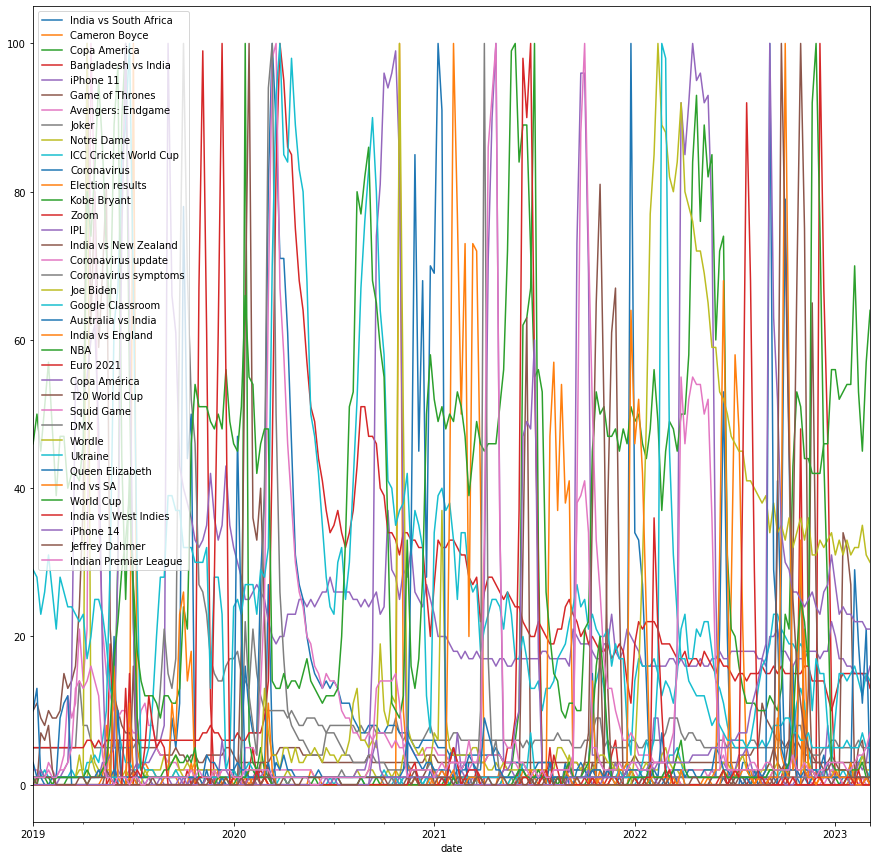

In [173]:
annual_trends_2019_2022.plot(figsize = (15,15))

In [175]:

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [178]:
output_dir = '/content/drive/MyDrive/dw_s2ds'

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

file_name = 'annual_trends_google_2019_2022.cvs'
file_path = op.join(output_dir, file_name)

annual_trends_2019_2022.to_csv(file_path)

## GET INTEREST FOR A SINGLE KEYWORD OVER SPECIFIED TIME PERIOD  


In [15]:
pytrend = TrendReq()
angie_does_google =pytrend.build_payload(kw_list= ['Angela Merkel'], timeframe=f'2010-01-01 {date.today()}')
angie_does_google = pytrend.interest_over_time()
angie_does_google = angie_does_google.drop('isPartial', axis = 'columns')


<AxesSubplot:xlabel='date'>

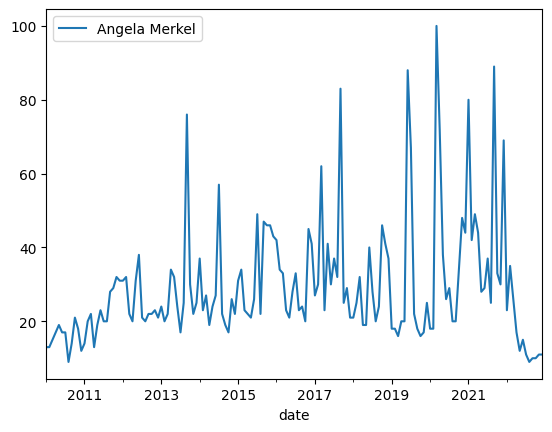

In [21]:
angie_does_google[:-3].plot()

In [20]:
angie_does_google[:-3]

,Angela Merkel
date,
2010-01-01,13
2010-02-01,13
2010-03-01,15
2010-04-01,17
2010-05-01,19
...,...
2022-08-01,9
2022-09-01,10
2022-10-01,10
